# RC Circuit

## We have connected a capacitor in a circuit with a resistor as shown below:

<img src="RCcir.jpg">

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

*Capacitor model gives the differential equation:*

\begin{equation}
v_c^{'}(t) = \frac{i(t)}{C}
\end{equation}

*Ohm's law states that,*

\begin{equation}
V_B - v_C(t) - v_R(t) = 0
\end{equation}

*And thus can rewrite the differential equation as,*

\begin{equation}
v_c^{'}(t) = \frac{1}{C} \Big(\frac{V_B(t) - v_c(t)}{R}\Big) 
\end{equation}

## v<sub>C</sub>'(t) = [(V<sub>b</sub> - v<sub>C</sub>(t)) / R] / C

*This is the differential equation model for the circuit.*

## Solution using numerical method

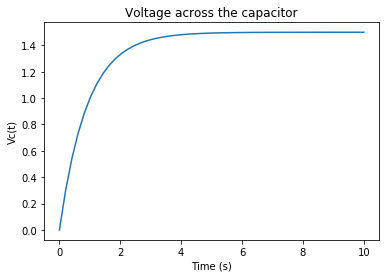

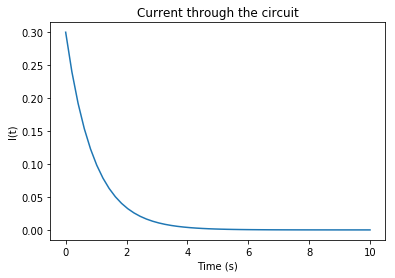

In [4]:
import numpy as np
import matplotlib.pyplot as plt

R = 5.0
C = 1.0
Vb = 1.5


t = np.linspace(0,10)
delta = 1

Vc = np.zeros(len(t))
I = np.zeros(len(t))
Vc[0] = 0
for i in range(1,len(Vc)):
    Vc[i] = Vc[i-1] + (delta/( R * C )) * (Vb - Vc[i-1])
    I[i-1]= C * (Vc[i]-Vc[i-1])

plt.plot(t,Vc)
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()

plt.plot(t,I)
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Current through the circuit')
plt.show()

## Using FFT when source is AC

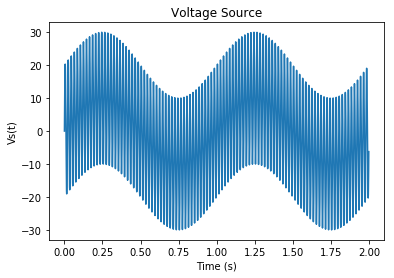

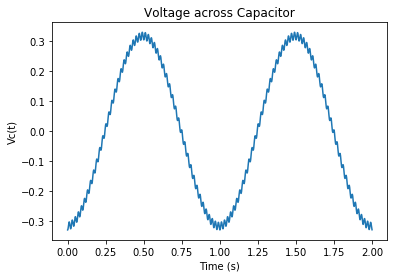

In [5]:
from numpy.fft import fft
from numpy.fft import ifft


R = 5.0
C = 1.0
T = 2

t = np.arange(0,T,0.001)
Vs = 10*np.sin(2*np.pi*1*t) + 20* np.sin(2*np.pi*50*t)
N = len(Vs)
w = np.ones(N)
w[0:N/2 +1]= 2 * np.pi / T * np.array([np.arange(0,N/2 +1)])
w[N/2+1 : N] = 2 * np.pi / T * np.arange(-(N/2 -1),0)
Vc = ifft(fft(Vs)/(1j*w*R*C + 1))

# only phase and magnitude changes
plt.plot(t,Vs)
plt.xlabel('Time (s)')
plt.ylabel('Vs(t)')
plt.title('Voltage Source')
plt.show()

plt.plot(t,np.real(Vc))
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across Capacitor')
plt.show()

### RC circuit acts as a low pass filter. Here the input is 10 * sin(2 * pi * 1t) + 20 * sin(2 * pi * 50t). When we measure the voltage across the capacitor, the magnitude of the high frequency component is supressed.